In [349]:
import numpy as np
import pandas as pd
import itertools
import numpy.random as rnd
import matplotlib.pyplot as plt
import timeit

In [350]:
import networkx as nx

In [375]:
graph = nx.generators.random_graphs.gnm_random_graph(100, 500, seed=None, directed=False)

In [376]:
for (u, v) in graph.edges():
    graph.edges[u,v]['weight'] = np.random.randint(0,100)

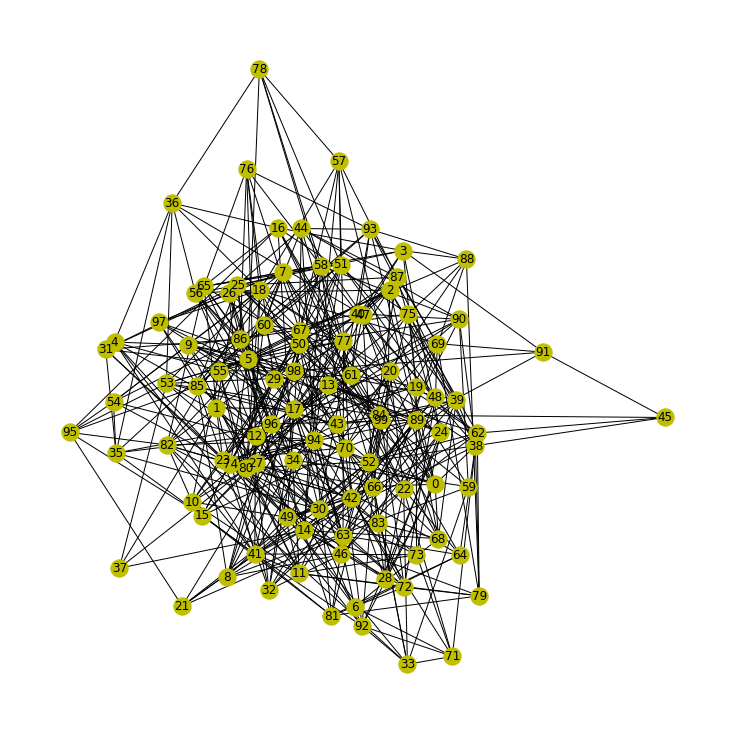

In [407]:
plt.figure(figsize=(10, 10))
nx.draw(graph,
        with_labels=True,
        node_color='y'
       )

plt.savefig('Graph.png', format='PNG')

In [408]:
# generate random point
rand_point = np.random.randint(0,100)

In [409]:
def source_paths(graph, method, source):
    if method == 'dijkstra':
        return nx.algorithms.shortest_paths.weighted.single_source_dijkstra_path(graph, source)
    elif method == 'bf':
        return nx.algorithms.shortest_paths.weighted.single_source_bellman_ford_path(graph, source)

In [410]:
dijkstra_path_time = []
for i in range(10):
    time = timeit.timeit(lambda: source_paths(graph, 'dijkstra', rand_point), number=1)
    dijkstra_path_time.append(time)

In [411]:
bf_path_time = []
for i in range(10):
    time = timeit.timeit(lambda: source_paths(graph, 'bf', rand_point), number=1)
    bf_path_time.append(time)

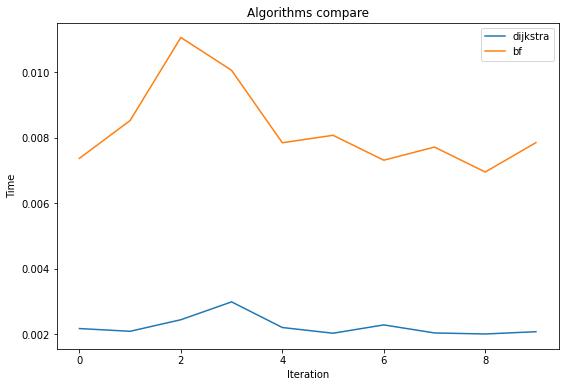

In [412]:
plt.figure(figsize=(9, 6))
plt.plot(dijkstra_path_time, label='dijkstra')
plt.plot(bf_path_time, label='bf')
plt.title("Algorithms compare")
plt.xlabel("Iteration")
plt.ylabel("Time")
plt.legend()
plt.savefig("Source_time.png", format='PNG')

In [269]:
def generate_grid(a, b):
    graph = nx.grid_2d_graph(10, 20) # generate grid
    obstacles = generate_obstacles(graph, 10, 20, 40) # generate obstacles
    graph.remove_nodes_from(obstacles)
    
    return graph

In [292]:
def generate_obstacles(g, a, b, n):
    obstacles = []
    while len(obstacles) != n:
        val1 = np.random.randint(0, a)
        val2 = np.random.randint(0, b)
        if (val1, val2) not in obstacles:
            obstacles.append((val1, val2))
            
    return obstacles

In [331]:
grid = generate_grid(10, 20)

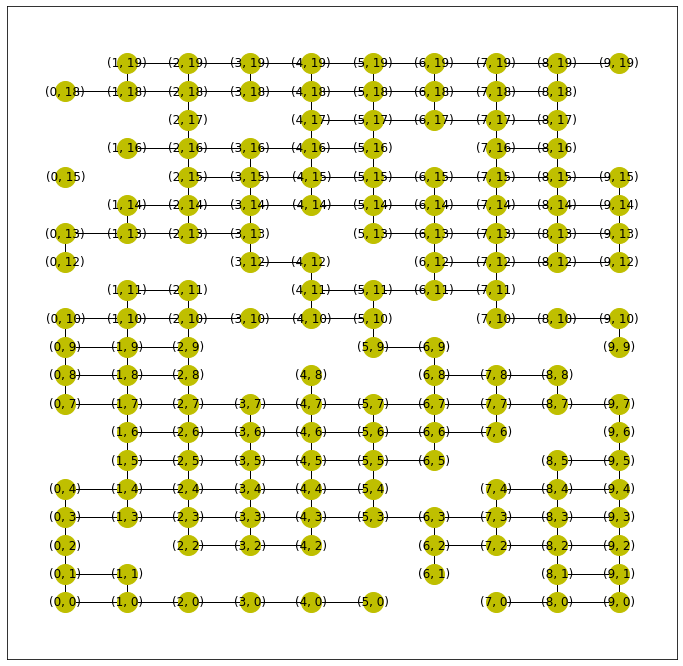

In [332]:
plt.figure(figsize=(12, 12))
nx.drawing.nx_pylab.draw_networkx(grid,
                                  node_size=400,
                                  with_labels=True,
                                  font_size=12,
                                  node_color='y',
                                  pos = dict((n, n) for n in grid.nodes()))

plt.savefig("Grid.png", format="PNG")

In [317]:
def generate_path_nodes(grid, a, b):
    nodes = grid.nodes
    points = []
    while len(points) != 2:
        val1 = np.random.randint(0, a)
        val2 = np.random.randint(0, b)
        point = (val1, val2)
        if point in nodes:
            points.append(point)
            
    return (points[0], points[1])

In [318]:
def find_path(grid):
    source, target = generate_path_nodes(grid, 10, 20)
    path = nx.astar_path(grid, source, target, heuristic=None)
    
    return path, source, target

In [347]:
path

[(9, 19),
 (8, 19),
 (7, 19),
 (7, 18),
 (7, 17),
 (7, 16),
 (7, 15),
 (6, 15),
 (6, 14),
 (6, 13),
 (6, 12),
 (6, 11),
 (5, 11),
 (4, 11),
 (4, 10),
 (3, 10),
 (2, 10),
 (1, 10),
 (1, 9),
 (1, 8),
 (1, 7),
 (1, 6),
 (1, 5),
 (1, 4),
 (0, 4),
 (0, 3),
 (0, 2),
 (0, 1),
 (1, 1),
 (1, 0)]

In [323]:
a_star_time = []
for i in range(50):
    time = timeit.timeit(lambda: find_path(grid), number=3)
    a_star_time.append(time)

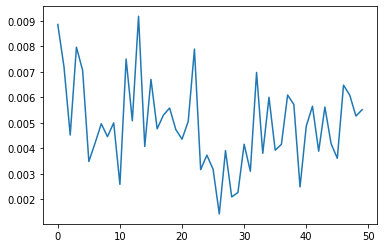

In [325]:
plt.plot(a_star_time)
plt.savefig("Path_time.png", format="PNG")

In [341]:
path, source, target = find_path(grid)

In [345]:
path

[(9, 19),
 (8, 19),
 (7, 19),
 (7, 18),
 (7, 17),
 (7, 16),
 (7, 15),
 (6, 15),
 (6, 14),
 (6, 13),
 (6, 12),
 (6, 11),
 (5, 11),
 (4, 11),
 (4, 10),
 (3, 10),
 (2, 10),
 (1, 10),
 (1, 9),
 (1, 8),
 (1, 7),
 (1, 6),
 (1, 5),
 (1, 4),
 (0, 4),
 (0, 3),
 (0, 2),
 (0, 1),
 (1, 1),
 (1, 0)]

In [342]:
removed_nodes = [item for item in list(grid.nodes()) if item not in path]

In [343]:
path_on_grid = grid.copy()
path_on_grid.remove_nodes_from(removed_nodes)

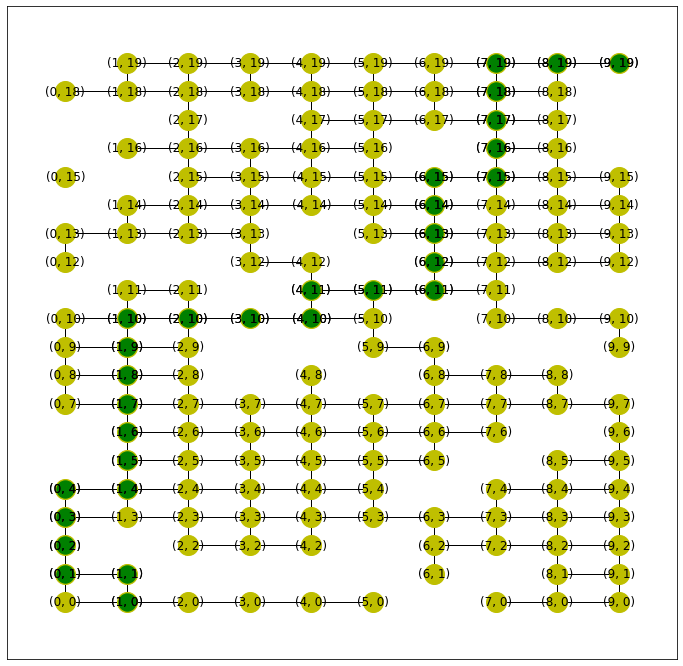

In [344]:
plt.figure(figsize=(12, 12))
nx.drawing.nx_pylab.draw_networkx(grid,
                                  node_size=400,
                                  with_labels=True,
                                  font_size=12,
                                  node_color='y',
                                  pos = dict((n, n) for n in grid.nodes())
                                 )

nx.drawing.nx_pylab.draw_networkx(path_on_grid,
                                  node_color='g',
                                  pos = dict((n, n) for n in path_on_grid.nodes())
                                 )

plt.savefig("Path.png", format="PNG")